In [4]:
import pandas as pd
import plotly.express as px

In [6]:
df=pd.read_csv("C:/Users/Administrator/Downloads/country_wise_latest.csv")
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [8]:
df.isna().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [12]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [16]:
total_confirmed = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
total_active = df['Active'].sum()

new_cases = df['New cases'].sum()
new_deaths = df['New deaths'].sum()
new_recovered = df['New recovered'].sum()


case_fatality_rate = (total_deaths / total_confirmed) * 100
recovery_rate = (total_recovered / total_confirmed) * 100
active_rate = (total_active / total_confirmed) * 100
death_to_recovery_ratio = total_deaths / total_recovered

print(f" Total Confirmed Cases: {total_confirmed:,}")
print(f" Total Deaths: {total_deaths:,}")
print(f" Total Recovered: {total_recovered:,}")
print(f" Total Active Cases: {total_active:,}\n")

print(f" New Cases (Today): {new_cases:,}")
print(f" New Deaths (Today): {new_deaths:,}")
print(f" New Recoveries (Today): {new_recovered:,}\n")

print(f" Case Fatality Rate (CFR): {case_fatality_rate:.2f}%")
print(f" Recovery Rate: {recovery_rate:.2f}%")
print(f" Active Case Rate: {active_rate:.2f}%")
print(f" Death-to-Recovery Ratio: {death_to_recovery_ratio:.2f}")

 Total Confirmed Cases: 16,480,485
 Total Deaths: 654,036
 Total Recovered: 9,468,087
 Total Active Cases: 6,358,362

 New Cases (Today): 228,693
 New Deaths (Today): 5,415
 New Recoveries (Today): 174,623

 Case Fatality Rate (CFR): 3.97%
 Recovery Rate: 57.45%
 Active Case Rate: 38.58%
 Death-to-Recovery Ratio: 0.07


Avg Recovered / 100 Cases: 64.82
Avg Deaths / 100 Cases: 3.02
       Country/Region  Confirmed  Confirmed last week  Weekly % Growth
130  Papua New Guinea         62                   19       226.315789
63             Gambia        326                  112       191.071429
11            Bahamas        382                  174       119.540230
186          Zimbabwe       2704                 1713        57.851722
99              Libya       2827                 1980        42.777778
58           Ethiopia      14547                10207        42.519839
22           Botswana        739                  522        41.570881
97            Lesotho        505                  359        40.668524
160          Suriname       1483                 1079        37.442076
41         Costa Rica      15841                11534        37.341772


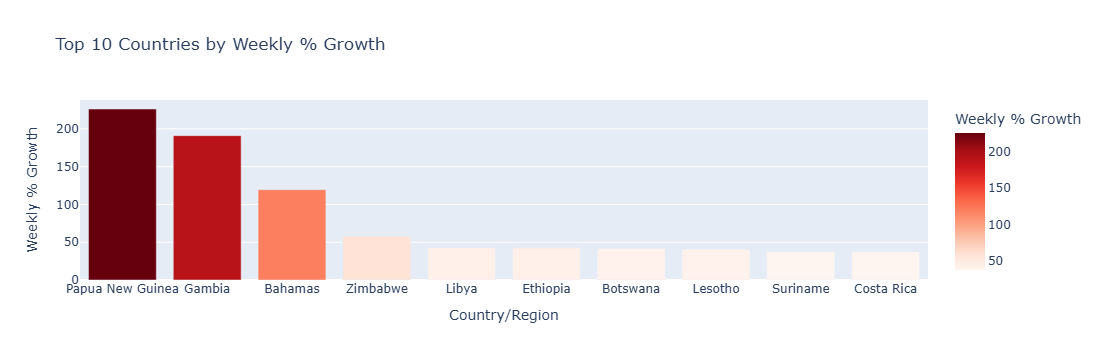

In [22]:

if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])

df['Weekly Increase'] = df['Confirmed'] - df['Confirmed last week']

df['Weekly % Growth'] = df['Weekly Increase'] / df['Confirmed last week'] * 100

if 'Date' in df.columns:

    daily_cases = df.groupby('Date')['New cases'].sum().reset_index()
    daily_cases['7-day Avg'] = daily_cases['New cases'].rolling(window=7).mean()

    fig1 = px.line(daily_cases, x='Date', y=['New cases', '7-day Avg'], 
                   title='Daily New Cases and 7-Day Rolling Average')
    fig1.show()

trend_rates = df[['Recovered / 100 Cases', 'Deaths / 100 Cases']].mean()

print(f"Avg Recovered / 100 Cases: {trend_rates['Recovered / 100 Cases']:.2f}")
print(f"Avg Deaths / 100 Cases: {trend_rates['Deaths / 100 Cases']:.2f}")

top_growth = df.sort_values(by='Weekly % Growth', ascending=False)[
    ['Country/Region', 'Confirmed', 'Confirmed last week', 'Weekly % Growth']
].head(10)

print(top_growth)

fig2 = px.bar(top_growth, 
              x='Country/Region', 
              y='Weekly % Growth', 
              title='Top 10 Countries by Weekly % Growth',
              color='Weekly % Growth',
              color_continuous_scale='Reds')
fig2.show()

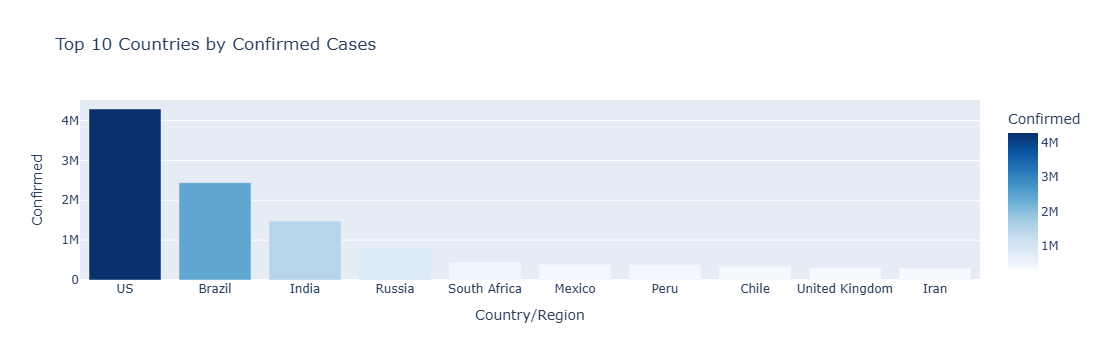

In [34]:

df = df[df['Country/Region'] != 'World']

df['Case Fatality Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100
df['Recovery Rate (%)'] = (df['Recovered'] / df['Confirmed']) * 100
df['Active Rate (%)'] = (df['Active'] / df['Confirmed']) * 100

top_confirmed = df.sort_values('Confirmed', ascending=False).head(10)
fig1 = px.bar(top_confirmed, x='Country/Region', y='Confirmed',
              title="Top 10 Countries by Confirmed Cases", color='Confirmed',
              color_continuous_scale='Blues')
fig1.show()

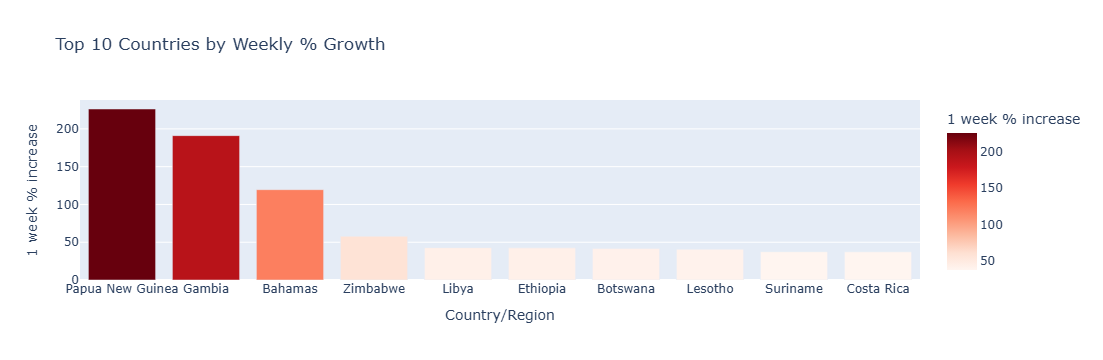

In [26]:
fig2 = px.bar(df.sort_values('1 week % increase', ascending=False).head(10),
              x='Country/Region', y='1 week % increase',
              title="Top 10 Countries by Weekly % Growth",
              color='1 week % increase', color_continuous_scale='Reds')
fig2.show()

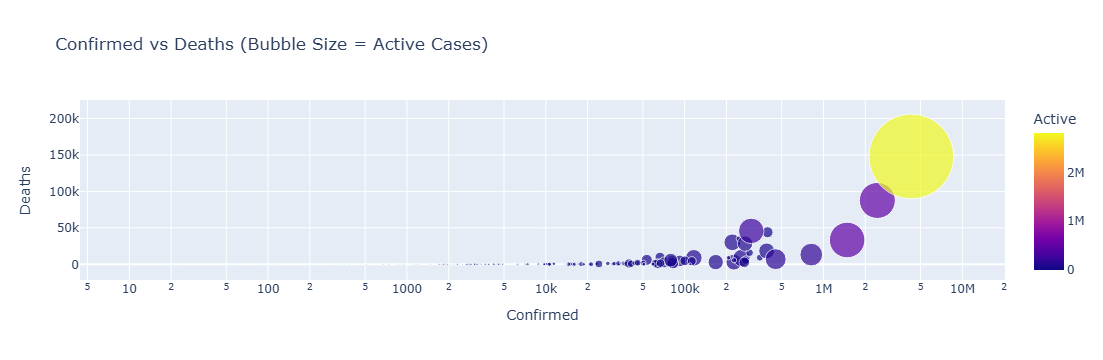

In [28]:
fig3 = px.scatter(df, x='Confirmed', y='Deaths', size='Active',
                  hover_name='Country/Region',
                  title="Confirmed vs Deaths (Bubble Size = Active Cases)",
                  color='Active', log_x=True, size_max=60)
fig3.show()

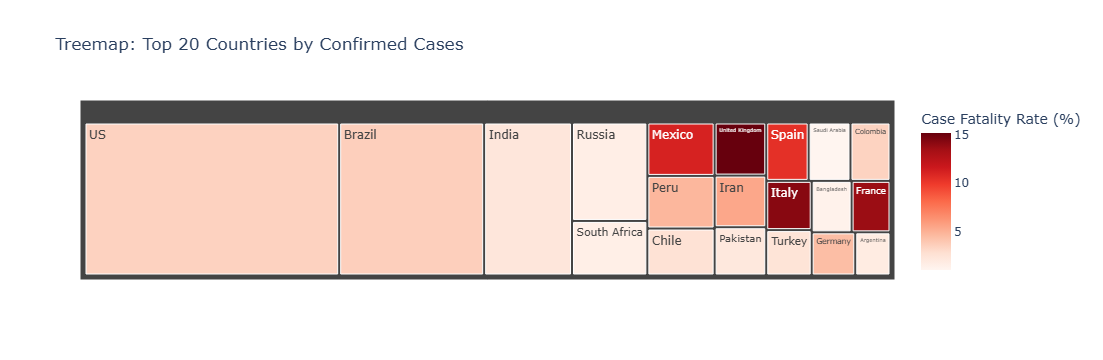

In [30]:
fig4 = px.treemap(df.sort_values('Confirmed', ascending=False).head(20),
                  path=['Country/Region'], values='Confirmed',
                  color='Case Fatality Rate (%)',
                  title='Treemap: Top 20 Countries by Confirmed Cases',
                  color_continuous_scale='Reds')
fig4.show()

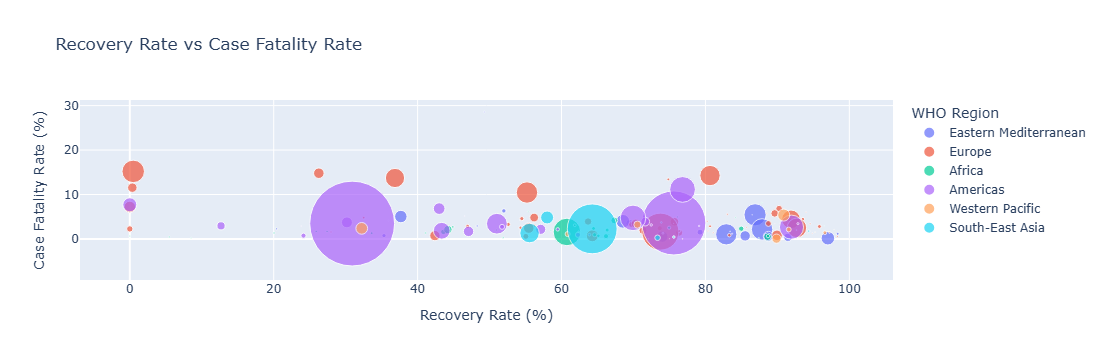

In [32]:
fig5 = px.scatter(df, x='Recovery Rate (%)', y='Case Fatality Rate (%)',
                  size='Confirmed', color='WHO Region' if 'WHO Region' in df.columns else 'Confirmed',
                  hover_name='Country/Region',
                  title='Recovery Rate vs Case Fatality Rate',
                  size_max=60)
fig5.show()

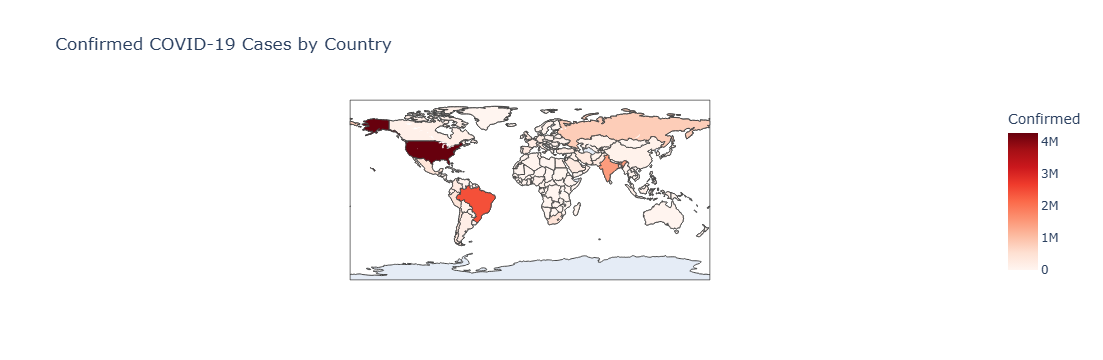

In [44]:
df['Country/Region'].replace({
    "US": "United States",
    "UK": "United Kingdom",
    "South Korea": "Korea, South",
    "Russia": "Russian Federation"
})

fig = px.choropleth(df,
                    locations='Country/Region',
                    locationmode='country names',
                    color='Confirmed',
                    hover_name='Country/Region',
                    color_continuous_scale='Reds',
                    title=' Confirmed COVID-19 Cases by Country')
fig.show()

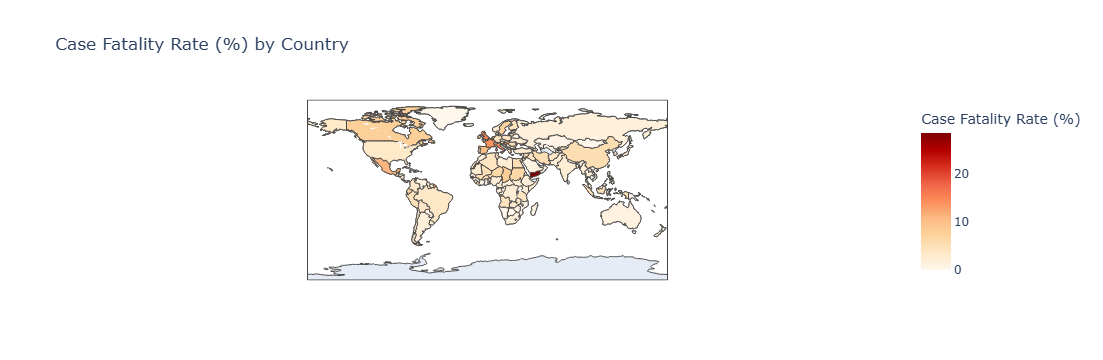

In [46]:
df['Case Fatality Rate (%)'] = (df['Deaths'] / df['Confirmed']) * 100

fig = px.choropleth(df,
                    locations='Country/Region',
                    locationmode='country names',
                    color='Case Fatality Rate (%)',
                    hover_name='Country/Region',
                    color_continuous_scale='OrRd',
                    title=' Case Fatality Rate (%) by Country')
fig.show()

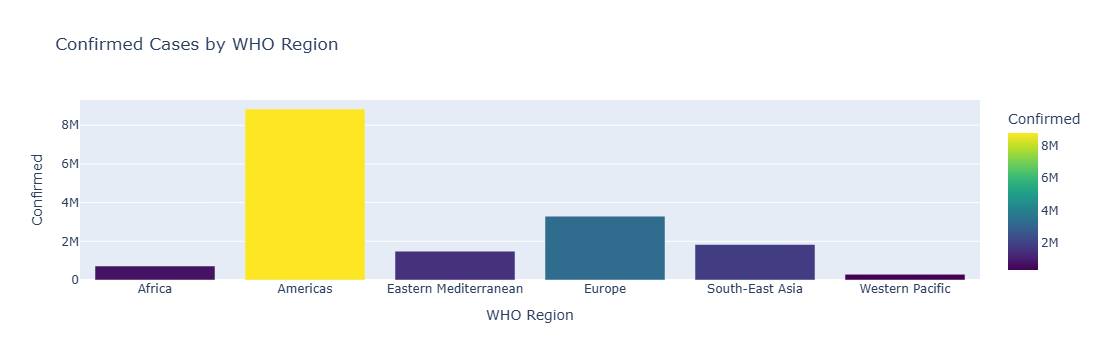

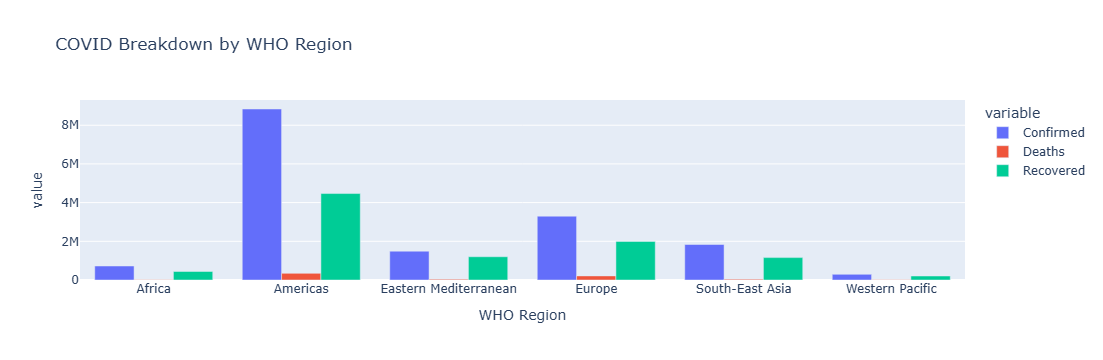

In [50]:
if 'WHO Region' in df.columns:
    region_df = df.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

    fig1 = px.bar(region_df, x='WHO Region', y='Confirmed',
                  title=" Confirmed Cases by WHO Region", color='Confirmed',
                  color_continuous_scale='Viridis')
    fig1.show()

    fig2 = px.bar(region_df, x='WHO Region',
                  y=['Confirmed', 'Deaths', 'Recovered'],
                  title=" COVID Breakdown by WHO Region",
                  barmode='group')
    fig2.show()